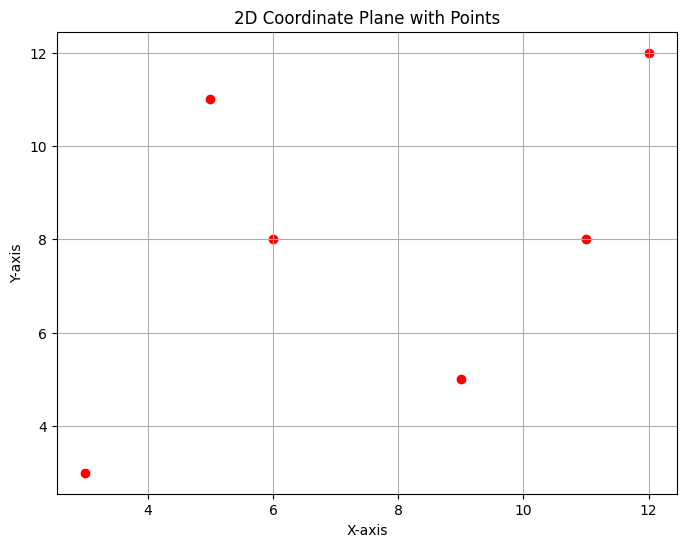

Euclidean Distance Matrix (Question 1d):
    A     B     C     D     E     F     
   ------------------------------------------
A  |0.0000 4.2426 6.3246 7.2111 7.6158 3.6056 
B  |4.2426 0.0000 5.8310 3.1623 7.2111 5.0000 
C  |6.3246 5.8310 0.0000 8.2462 12.7279 9.4340 
D  |7.2111 3.1623 8.2462 0.0000 7.0711 6.7082 
E  |7.6158 7.2111 12.7279 7.0711 0.0000 4.1231 
F  |3.6056 5.0000 9.4340 6.7082 4.1231 0.0000 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#data point from T7 1d)
points = {
    'A': (9, 5),
    'B': (6, 8),
    'C': (3, 3),
    'D': (5, 11),
    'E': (12, 12),
    'F': (11, 8)
}

x_coords = [points[point][0] for point in points]
y_coords = [points[point][1] for point in points]
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Coordinate Plane with Points')
plt.grid(True)
plt.show()

def manhattan_distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


points_list = list(points.values())
points_names = list(points.keys())
distance_matrix = []
for i in range(len(points_list)):
    row = []
    for j in range(len(points_list)):
        row.append(euclidean_distance(points_list[i], points_list[j]))
    distance_matrix.append(row)

print("Euclidean Distance Matrix (Question 1d):")
print("    ", end="")
for name in points_names:
    print(f"{name:<6}", end="")
print()
print("   " + "-" * (len(points_names) * 7))

for i, row in enumerate(distance_matrix):
    print(f"{points_names[i]:<3}|", end="")
    for dist in row:
        print(f"{dist:<6.4f}", end=" ")
    print()


In [13]:
import pandas as pd

vectors = {
    'A': np.array([9, 5]),
    'B': np.array([6, 8]),
    'C': np.array([3, 3]),
    'D': np.array([5, 11]),
    'E': np.array([12, 12]),
    'F': np.array([11, 8])
}

points = list(vectors.keys())
n = len(points)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = np.linalg.norm(vectors[points[i]] - vectors[points[j]])

df_distance = pd.DataFrame(distance_matrix, index=points, columns=points)
print("Initial Distance Matrix:\n", df_distance)

Initial Distance Matrix:
           A         B          C         D          E         F
A  0.000000  4.242641   6.324555  7.211103   7.615773  3.605551
B  4.242641  0.000000   5.830952  3.162278   7.211103  5.000000
C  6.324555  5.830952   0.000000  8.246211  12.727922  9.433981
D  7.211103  3.162278   8.246211  0.000000   7.071068  6.708204
E  7.615773  7.211103  12.727922  7.071068   0.000000  4.123106
F  3.605551  5.000000   9.433981  6.708204   4.123106  0.000000


**Identifying and Merging the Two Clusters with the Shortest Distance**

Looking at the distance matrix, the shortest distance is approximately 3.16, which is between clusters B and D. Therefore, we merge clusters B and D into a new cluster (BD).

**Recomputing the Distance Matrix**

When merging two clusters, we need a method to calculate the distance between the new cluster and the remaining clusters. For simplicity in this step-by-step illustration, we will use the single linkage method, where the distance between two clusters is the minimum distance between any two points in the two clusters.

* Distance(BD, A): min(Distance(B, A), Distance(D, A)) = min(4.24, 7.21) = 4.24
* Distance(BD, C): min(Distance(B, C), Distance(D, C)) = min(5.83, 8.25) = 5.83
* Distance(BD, E): min(Distance(B, E), Distance(D, E)) = min(7.21, 7.07) = 7.07
* Distance(BD, F): min(Distance(B, F), Distance(D, F)) = min(5.00, 6.71) = 5.00

The updated distance matrix after the first merge (BD) is:



```
      A    BD     C     E     F
A   0.00  4.24  6.32  7.62  3.61
BD  4.24  0.00  5.83  7.07  5.00
C   6.32  5.83  0.00 12.73  9.43
E   7.62  7.07 12.73  0.00  4.12
F   3.61  5.00  9.43  4.12  0.00
```



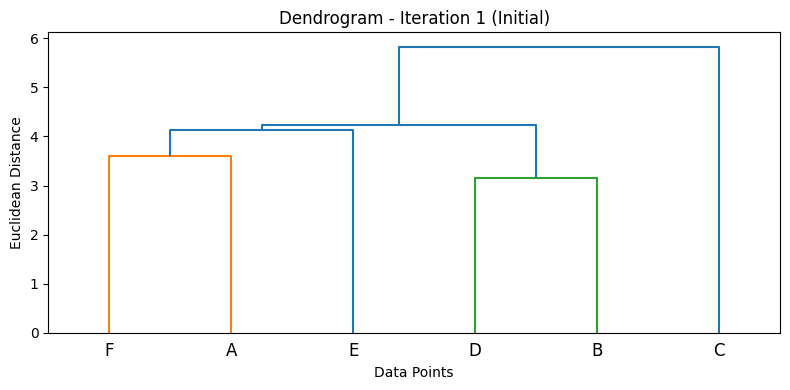

In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Prepare data for linkage function
data_points = np.array(list(vectors.values()))
linked = linkage(data_points, 'single') # Using single linkage for demonstration

plt.figure(figsize=(8, 4))
dendrogram(linked,
            orientation='top',
            labels=list(vectors.keys()),
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram - Iteration 1 (Initial)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

# Manual first merge (B and D) - for subsequent iterations,
# we'd use the linkage output

# --- Iteration 2 (Manual Step Reflected in Dendrogram) ---
# Clusters (B, D), A, C, E, F
# The dendrogram already visually represents this merge at height ~3.16

# --- Iteration 3 (Manual Step Reflected in Dendrogram) ---
# The next shortest distance in the updated matrix is 3.61 between A and F.
# The dendrogram will show A and F merging at a height of 3.61.

# --- Subsequent Iterations (Visually Interpreted from Dendrogram) ---
# The dendrogram will continue to merge clusters based on the shortest distances
# in each subsequent distance matrix (calculated using single linkage between
# the newly formed cluster and existing ones).
# The height of each horizontal line in the dendrogram represents the distance
# at which the clusters below it were merged.

In the context of clustering, **inertia** (often referred to as the **within-cluster sum of squares** or **WCSS**) is a metric used to evaluate the quality of clusters formed by algorithms like K-Means. It measures the sum of the squared distances of each data point to the centroid of the cluster it belongs to. The goal of K-Means is to minimize this inertia.



Mathematically, inertia can be represented by the following formula:

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

Where:

* $k$ is the number of clusters.
* $C_i$ represents the $i$-th cluster.
* $x$ is a data point belonging to cluster $C_i$.
* $\mu_i$ is the centroid (mean) of cluster $C_i$.
* $||x - \mu_i||^2$ is the squared Euclidean distance between the data point $x$ and the centroid $\mu_i$.

In simpler terms, for each cluster, we calculate the distance of every point within that cluster to its center, square these distances, and then sum them up. The inertia is the total of these summed squared distances across all clusters.


A **lower inertia value** generally indicates that the data points within each cluster are tightly packed and close to their respective centroids, suggesting better clustering. However, inertia tends to **decrease as the number of clusters increases**, as each data point becomes closer to its own centroid in a finer partitioning. Therefore, inertia alone is **not sufficient** to determine the optimal number of clusters, and it is often used in conjunction with methods like the Elbow method to find a balance between compactness and the number of clusters.

In [25]:
import numpy as np

# Data points in Cluster 1
cluster1_points = np.array([[1, 6], [2, 7], [3, 9]])

# Centroid of Cluster 1
centroid1 = np.array([2.5, 3.5])

# Calculate the squared Euclidean distances for each point to the centroid
squared_distances = np.sum((cluster1_points - centroid1)**2, axis=1)

# Calculate the inertia for Cluster 1
inertia_cluster1 = np.sum(squared_distances)

print(f"Data points in Cluster 1: {cluster1_points}")
print(f"Centroid of Cluster 1: {centroid1}")
print(f"Squared distances to the centroid: {squared_distances}")
print(f"Inertia for Cluster 1: {inertia_cluster1}")

Data points in Cluster 1: [[1 6]
 [2 7]
 [3 9]]
Centroid of Cluster 1: [2.5 3.5]
Squared distances to the centroid: [ 8.5 12.5 30.5]
Inertia for Cluster 1: 51.5


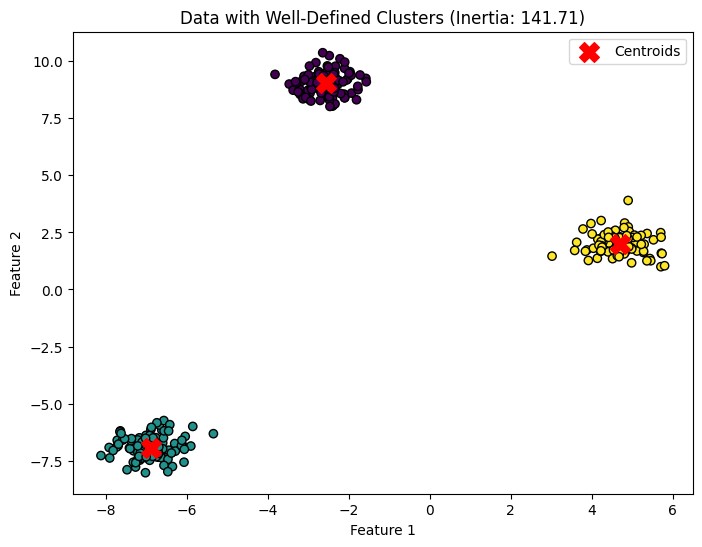

Inertia for well-defined clusters: 141.71


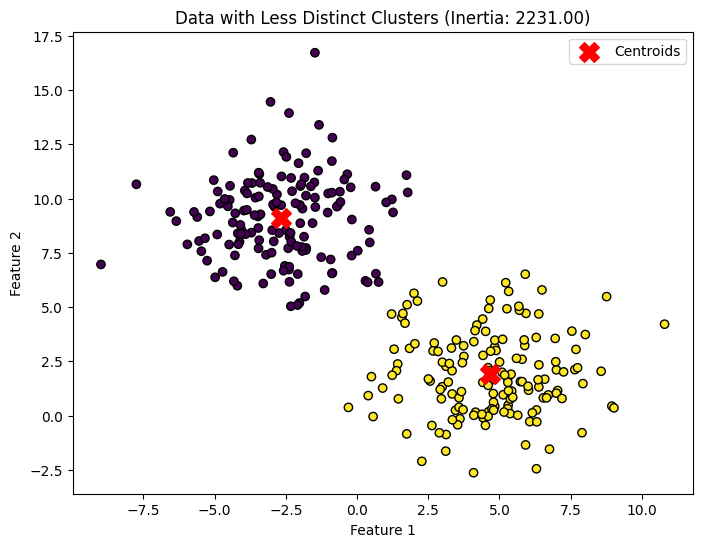

Inertia for less distinct clusters: 2231.00


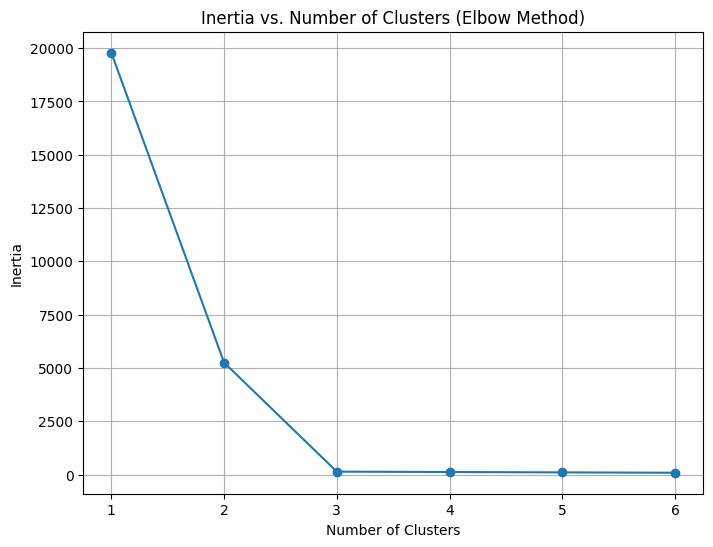

In [26]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Example 1: Data with well-defined clusters (low inertia expected)
X_low, y_low = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)

kmeans_low = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_low.fit(X_low)
inertia_low = kmeans_low.inertia_
centroids_low = kmeans_low.cluster_centers_
labels_low = kmeans_low.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_low[:, 0], X_low[:, 1], c=labels_low, cmap='viridis', edgecolors='k')
plt.scatter(centroids_low[:, 0], centroids_low[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f'Data with Well-Defined Clusters (Inertia: {inertia_low:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Inertia for well-defined clusters: {inertia_low:.2f}")

# Example 2: Data with less distinct clusters (high inertia expected)
X_high, y_high = make_blobs(n_samples=300, centers=2, cluster_std=2.0, random_state=42)

kmeans_high = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_high.fit(X_high)
inertia_high = kmeans_high.inertia_
centroids_high = kmeans_high.cluster_centers_
labels_high = kmeans_high.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_high[:, 0], X_high[:, 1], c=labels_high, cmap='viridis', edgecolors='k')
plt.scatter(centroids_high[:, 0], centroids_high[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f'Data with Less Distinct Clusters (Inertia: {inertia_high:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Inertia for less distinct clusters: {inertia_high:.2f}")

# Example 3: Increasing number of clusters on the same data (decreasing inertia)
inertia_values = []
num_clusters_range = range(1, 7)
for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_low)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

The data with well-defined clusters (X_low) results in a lower inertia value compared to the data with less distinct clusters (X_high).

As the number of clusters increases (in the third example), the inertia value tends to decrease. This highlights that a very low inertia can be achieved by having as many clusters as data points (where inertia would be zero), but this is not a meaningful clustering.

Low inertia is a desirable property of clusters, indicating compactness and cohesion, while high inertia suggests less well-defined or separated clusters. **However, inertia should always be considered in the context of the data and the number of clusters, as simply minimizing inertia might lead to overfitting.**

Two ethods used to determine a suitable number of clusters (k) for the K-means algorithm are the Elbow Method and the Silhouette Score.

**1. The Elbow Method**

The Elbow Method involves running the K-means algorithm for a range of possible values of k (e.g., from 1 to 10 or more). For each k, we calculate the within-cluster sum of squares (WCSS), also known as inertia. We then plot the WCSS against the number of clusters. The "elbow" point in the resulting plot, where the rate of decrease in WCSS sharply changes, is often considered a good estimate for the optimal number of clusters. This is because adding more clusters beyond the elbow point does not significantly reduce the WCSS, indicating diminishing returns.

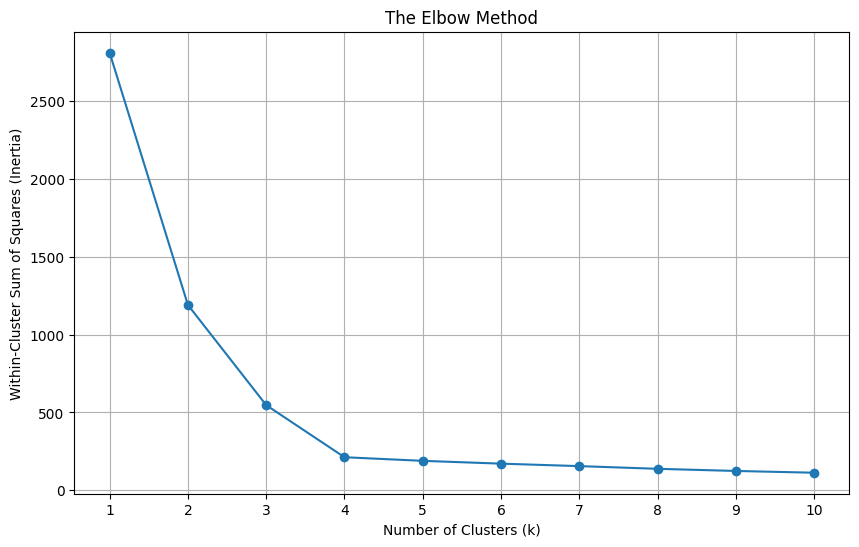

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Range of number of clusters to try
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Identify the elbow point visually from the plot
# In this example, the elbow appears to be around k=4
#
# Note that we look for the point where the decrease in inertia starts to level off,
# resembling an "elbow" in the curve.
# This point suggests a good balance between minimizing
# within-cluster variance and the number of clusters.


**2. The Silhouette Score**

The Silhouette Score measures how well each data point fits into its assigned cluster compared to other clusters. For each data point:

* Calculate the average distance to all other points within its own cluster ($a$).
* Calculate the average distance to all points in the nearest other cluster ($b$).

The silhouette score for that data point is then calculated as:

$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$

The silhouette score ranges from -1 to 1:

* **+1:** Indicates that the data point is far away from the neighboring clusters and clearly belongs to its own cluster.
* **0:** Indicates that the data point is close to the decision boundary between two neighboring clusters.
* **-1:** Indicates that the data point might have been assigned to the wrong cluster.

To determine the optimal number of clusters using the silhouette score, we calculate the average silhouette score for all data points for different values of $k$. The $k$ that yields the highest average silhouette score is often considered the optimal number of clusters, as it indicates well-separated and cohesive clusters.

For n_clusters = 2, the average silhouette_score is : 0.5426


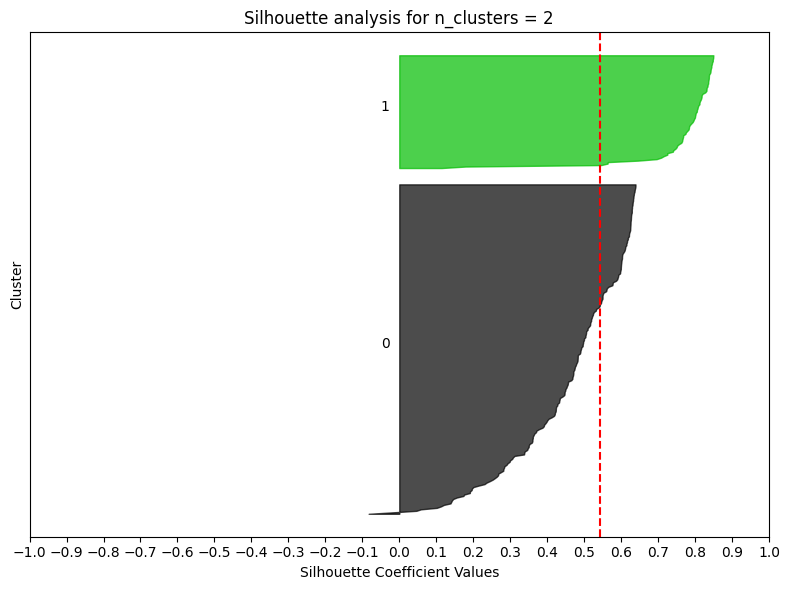

For n_clusters = 3, the average silhouette_score is : 0.5890


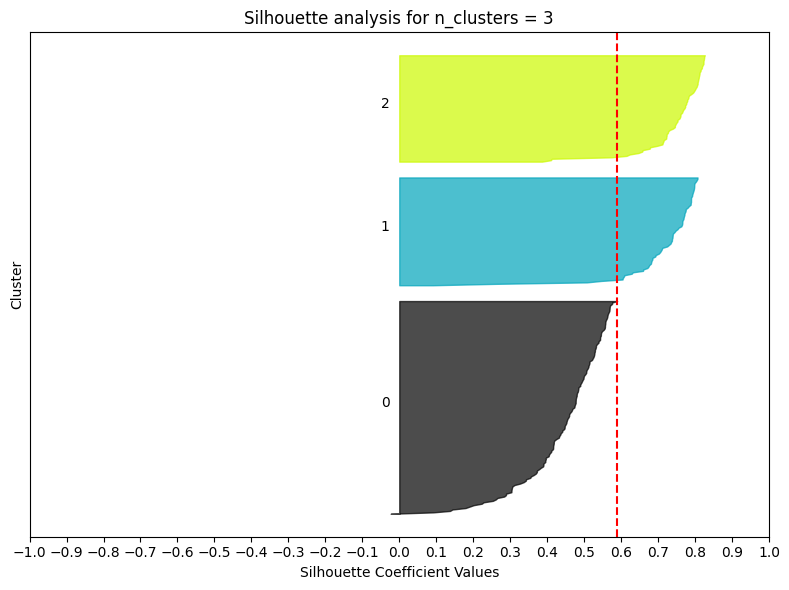

For n_clusters = 4, the average silhouette_score is : 0.6820


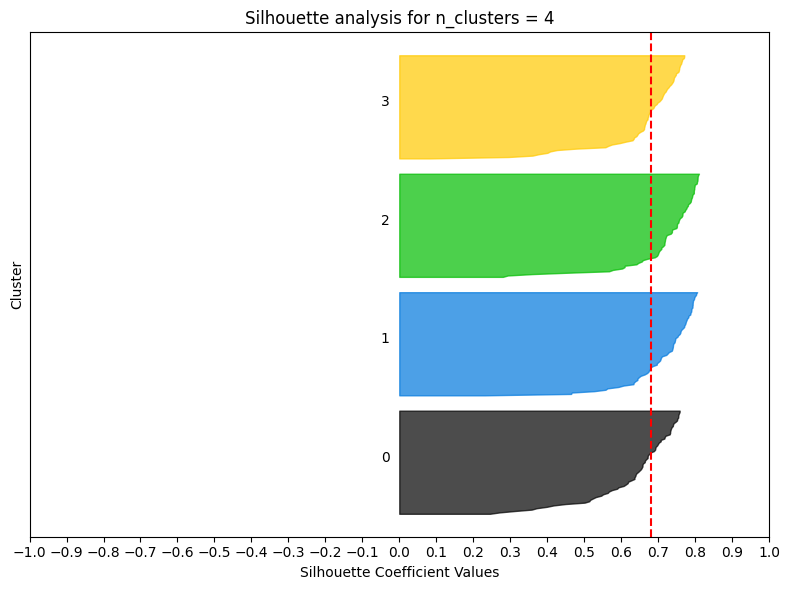

For n_clusters = 5, the average silhouette_score is : 0.5924


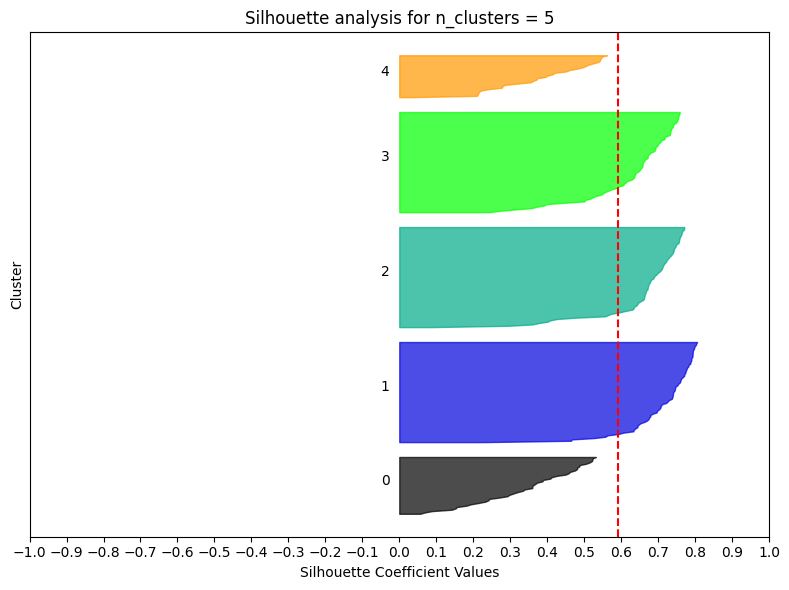

For n_clusters = 6, the average silhouette_score is : 0.4934


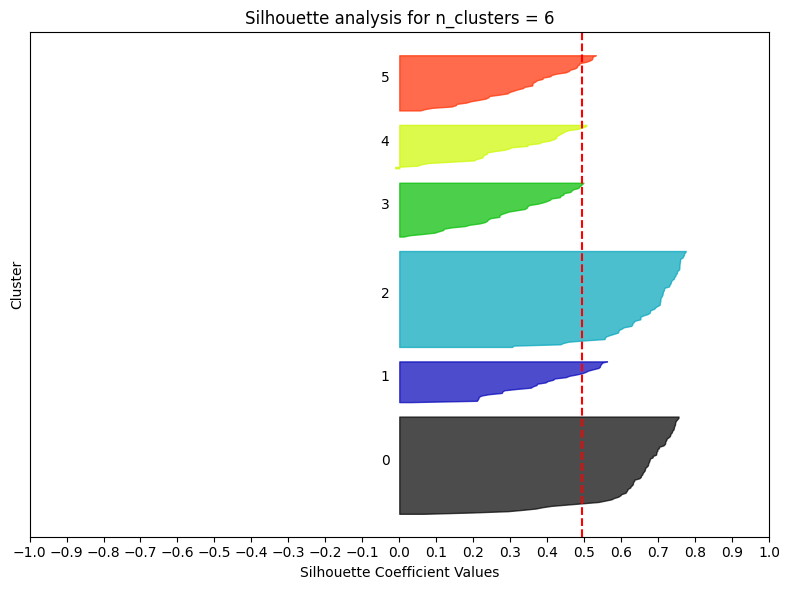

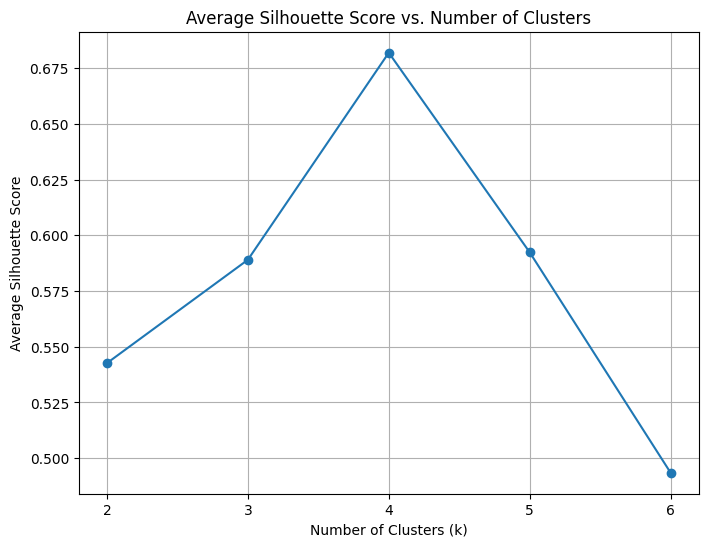

The optimal number of clusters based on silhouette score is: 4


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Range of number of clusters to try
silhouette_scores = []
k_range = range(2, 7)  # Silhouette score requires at least 2 clusters

for k in k_range:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    # Run K-Means
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.4f}")

    # Get silhouette samples for each point
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette analysis for n_clusters = {k}")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster")

    # The vertical line for the average silhouette score of all the samples
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-1, 1.1, 0.1))

    plt.tight_layout()
    plt.show()

# Plot the average silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# The k with the highest silhouette score is often chosen
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette score is: {best_k_silhouette}")




Note that both the Elbow Method and the Silhouette Score provide valuable insights into choosing the appropriate number of clusters for K-means. The Elbow Method is computationally less expensive but relies on visual interpretation, which can be subjective. The Silhouette Score provides a more quantitative measure but can be computationally more intensive. It's often beneficial to use both methods (and potentially others) to make a more informed decision about the optimal number of clusters.